In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [20]:
df = pd.read_csv('C:\\Users\\Rober\\Desktop\\PROYECTS\\NVIDIA Proyect\\nvidia_stock_data_clean.csv')

In [21]:
df["date"] = pd.to_datetime(df["date"]).dt.date

In [22]:
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2000-01-03,46.81,47.63,45.2500,47.25,626900,0.089444,0.091011,0.086464,0.090285,300911849,0.0,1.0
1,2000-01-04,45.56,46.13,43.2500,46.00,626000,0.087056,0.088145,0.082642,0.087897,300479849,0.0,1.0
2,2000-01-05,44.19,45.00,43.7500,44.25,392400,0.084438,0.085986,0.083597,0.084553,188351905,0.0,1.0
3,2000-01-06,41.19,44.06,39.5000,44.06,251000,0.078706,0.084190,0.075477,0.084190,120479939,0.0,1.0
4,2000-01-07,41.88,42.31,40.3800,41.00,148300,0.080024,0.080846,0.077158,0.078343,71183964,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,2025-02-14,138.85,139.25,135.5000,136.48,195479557,138.850000,139.250000,135.500000,136.480000,195479557,0.0,1.0
6319,2025-02-18,139.40,143.44,137.9250,141.27,219176627,139.400000,143.440000,137.925000,141.270000,219176627,0.0,1.0
6320,2025-02-19,139.23,141.36,137.2200,139.51,167536006,139.230000,141.360000,137.220000,139.510000,167536006,0.0,1.0
6321,2025-02-20,140.11,140.66,136.7901,140.03,143903583,140.110000,140.660000,136.790100,140.030000,143903583,0.0,1.0


2024-06-10 (NVIDIA split their shares by 10)
2021-07-20 (NVIDIA split their shares by 4)

In [24]:
splits = [
    {"date": "2021-07-20", "factor": 4},
    {"date": "2024-06-10", "factor": 10},
]

# Convert 'date' column to datetime if it's not already
df["date"] = pd.to_datetime(df["date"])

# Adjust prices based on splits
for split in splits:
    df.loc[df["date"] < split["date"], ["close", "high", "low", "open"]] /= split["factor"]


<Figure size 1000x500 with 0 Axes>

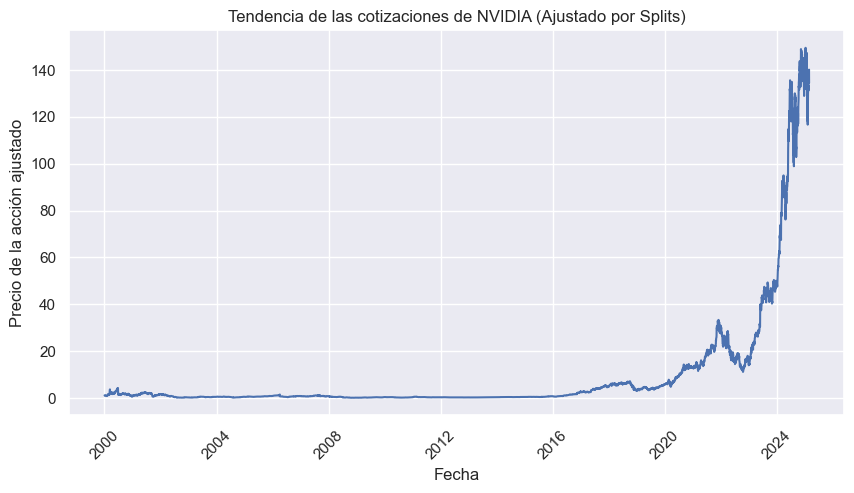

In [25]:
import matplotlib.dates as mdates
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="date", y="close")
plt.title("Tendencia de las cotizaciones de NVIDIA (Ajustado por Splits)")
plt.xlabel("Fecha")
plt.ylabel("Precio de la acción ajustado")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()


### NVIDIA CANDLE STICK CHART


In [26]:
import pandas as pd
import numpy as np 
import mplfinance as mpf 

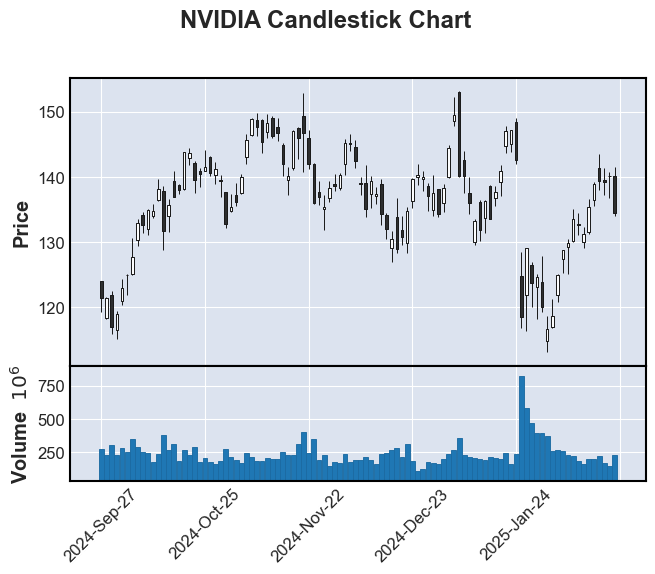

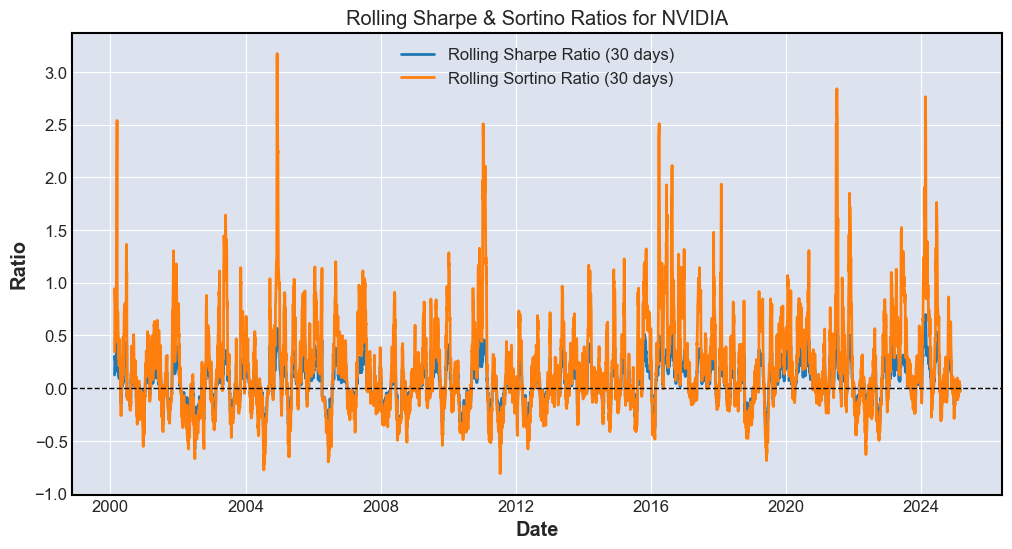

In [34]:
# Candlestick Chart

mpf.plot(df[-100:], type='candle', volume=True, title='NVIDIA Candlestick Chart', mav=(100, 250))

# Calculate daily returns
df['Returns'] = df['close'].pct_change()

# Rolling Sharpe Ratio (30-day window)
risk_free_rate = 0.02 / 252  # Assuming 2% annual risk-free rate
df['Rolling_Sharpe'] = (df['Returns'].rolling(30).mean() - risk_free_rate) / df['Returns'].rolling(30).std()

# Rolling Sortino Ratio (30-day window)
df['Downside_Deviation'] = df['Returns'].apply(lambda x: x if x < 0 else 0).rolling(30).std()
df['Rolling_Sortino'] = (df['Returns'].rolling(30).mean() - risk_free_rate) / df['Downside_Deviation']

# Plot Rolling Sharpe & Sortino Ratios
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rolling_Sharpe'], label='Rolling Sharpe Ratio (30 days)')
plt.plot(df.index, df['Rolling_Sortino'], label='Rolling Sortino Ratio (30 days)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.title("Rolling Sharpe & Sortino Ratios for NVIDIA")
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.show()
